In [ ]:
# Import library yang diperlukan
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

Akurasi: 0.80


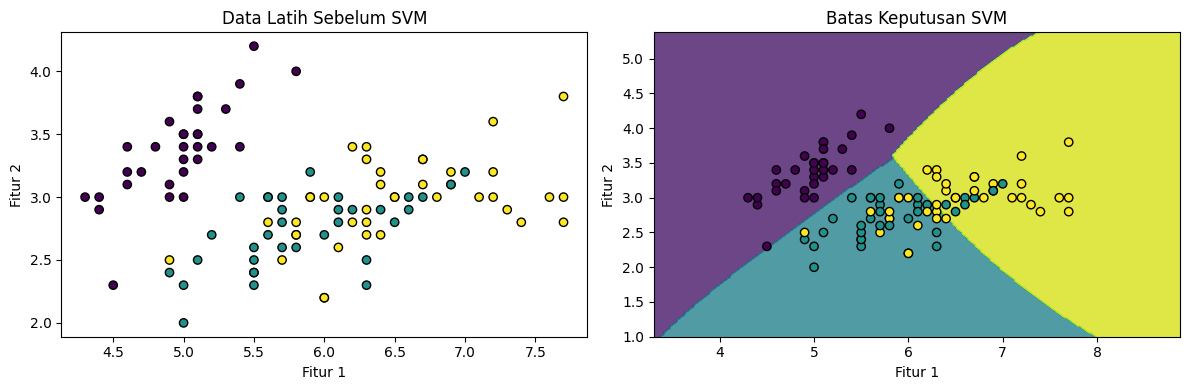

In [ ]:
# Memuat dataset Iris sebagai contoh
iris = datasets.load_iris()
X = iris.data[:, :2]  # Mengambil hanya dua fitur pertama untuk tujuan visualisasi
y = iris.target

# Membagi data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Visualisasi data sebelum proses SVM
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, marker='o', edgecolors='k')
plt.xlabel('Fitur 1')
plt.ylabel('Fitur 2')
plt.title('Data Latih Sebelum SVM')

# Membuat model SVM dengan kernel rbf
svm_model = SVC(kernel='rbf')

# Melatih model SVM pada data latih
svm_model.fit(X_train, y_train)

# Memprediksi kelas pada data uji
y_pred = svm_model.predict(X_test)

# Menghitung akurasi
accuracy = accuracy_score(y_test, y_pred)
print(f'Akurasi: {accuracy:.2f}')

# Visualisasi batas keputusan
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))
Z = svm_model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Visualisasi data setelah proses SVM
plt.subplot(1, 2, 2)
plt.contourf(xx, yy, Z, alpha=0.8)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, marker='o', edgecolors='k')
plt.xlabel('Fitur 1')
plt.ylabel('Fitur 2')
plt.title('Batas Keputusan SVM')

plt.tight_layout()
plt.show()